In [ ]:
# For Colab
!pip install -q yfinance

     |████████████████████████████████| 5.5MB 13.1MB/s 


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot, skew, kurtosis, norm
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = [16, 9]
plt.rcParams['axes.grid'] = True

Download Financial Securities and DJI (2010-2019)
1. Bank of America Corporation (BAC)
2. Advanced Micro Devices, Inc. (AMD)
3. American Airlines Group Inc. (AAL)
4. Invesco QQQ Trust (QQQ)

In [ ]:
data = yf.download('BAC AMD AAL QQQ ^DJI', start='2010-01-01', end='2019-12-31')
data.fillna(method='bfill', inplace=True)
data.columns

[*********************100%***********************]  5 of 5 completed


MultiIndex([('Adj Close',  'AAL'),
            ('Adj Close',  'AMD'),
            ('Adj Close',  'BAC'),
            ('Adj Close',  'QQQ'),
            ('Adj Close', '^DJI'),
            (    'Close',  'AAL'),
            (    'Close',  'AMD'),
            (    'Close',  'BAC'),
            (    'Close',  'QQQ'),
            (    'Close', '^DJI'),
            (     'High',  'AAL'),
            (     'High',  'AMD'),
            (     'High',  'BAC'),
            (     'High',  'QQQ'),
            (     'High', '^DJI'),
            (      'Low',  'AAL'),
            (      'Low',  'AMD'),
            (      'Low',  'BAC'),
            (      'Low',  'QQQ'),
            (      'Low', '^DJI'),
            (     'Open',  'AAL'),
            (     'Open',  'AMD'),
            (     'Open',  'BAC'),
            (     'Open',  'QQQ'),
            (     'Open', '^DJI'),
            (   'Volume',  'AAL'),
            (   'Volume',  'AMD'),
            (   'Volume',  'BAC'),
            (   'Vol

In [ ]:
data.head()

Adj Close                   ...     Volume                     
                 AAL   AMD        BAC  ...        BAC       QQQ       ^DJI
Date                                   ...                                
2010-01-04  4.496876  9.70  13.731325  ...  180845200  62822800  179780000
2010-01-05  5.005957  9.71  14.177655  ...  209521300  62935600  188540000
2010-01-06  4.798555  9.57  14.343938  ...  205257900  96033000  186040000
2010-01-07  4.939965  9.47  14.816527  ...  320868400  77094100  217390000
2010-01-08  4.845690  9.43  14.685253  ...  220104700  88886600  172710000

[5 rows x 30 columns]

In [ ]:
data.tail()

Adj Close                        ...    Volume                     
                  AAL        AMD        BAC  ...       BAC       QQQ       ^DJI
Date                                         ...                               
2019-12-23  29.192120  45.459999  34.251415  ...  33995400  23774700  223530000
2019-12-24  29.072563  46.540001  34.300117  ...  13805400   7089000   86150000
2019-12-26  29.560759  46.630001  34.592278  ...  26992100  17067500  155970000
2019-12-27  28.335287  46.180000  34.426716  ...  28111300  18134100  182280000
2019-12-30  28.195801  45.520000  34.231945  ...  30705100  21815500  181600000

[5 rows x 30 columns]

Historical Data of All Assets

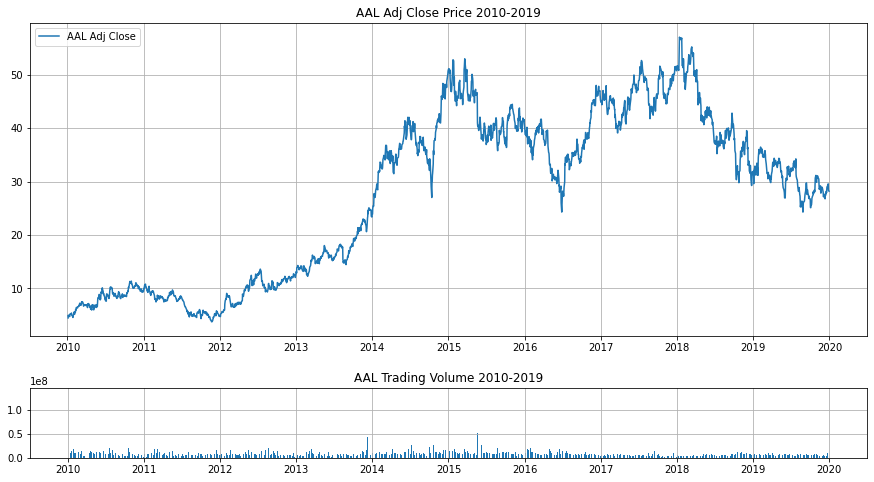

In [ ]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(data['Adj Close']['AAL'].index, data['Adj Close']['AAL'], label='AAL Adj Close')
plt.title('AAL Adj Close Price 2010-2019')
plt.legend(loc=2)
plt.grid(True)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(data['Volume']['AAL'].index, data['Volume']['AAL'])
plt.title('AAL Trading Volume 2010-2019')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

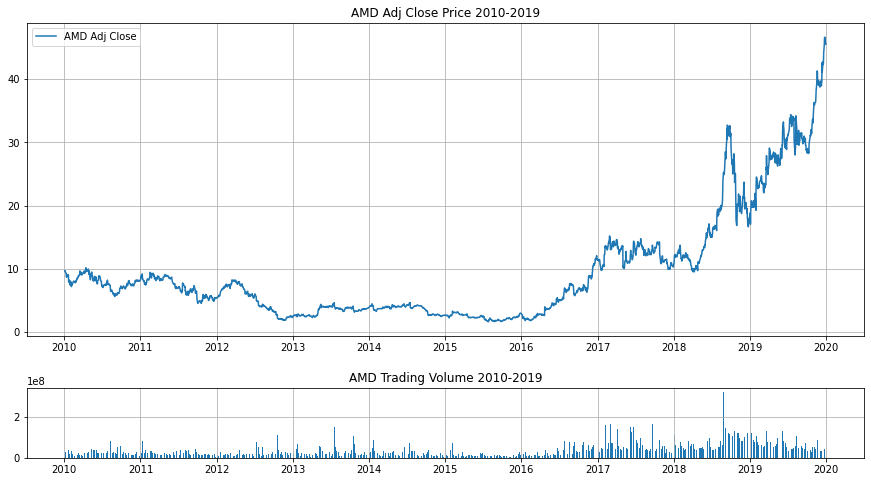

In [ ]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(data['Adj Close']['AMD'].index, data['Adj Close']['AMD'], label='AMD Adj Close')
plt.title('AMD Adj Close Price 2010-2019')
plt.legend(loc=2)
plt.grid(True)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(data['Volume']['AMD'].index, data['Volume']['AMD'])
plt.title('AMD Trading Volume 2010-2019')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

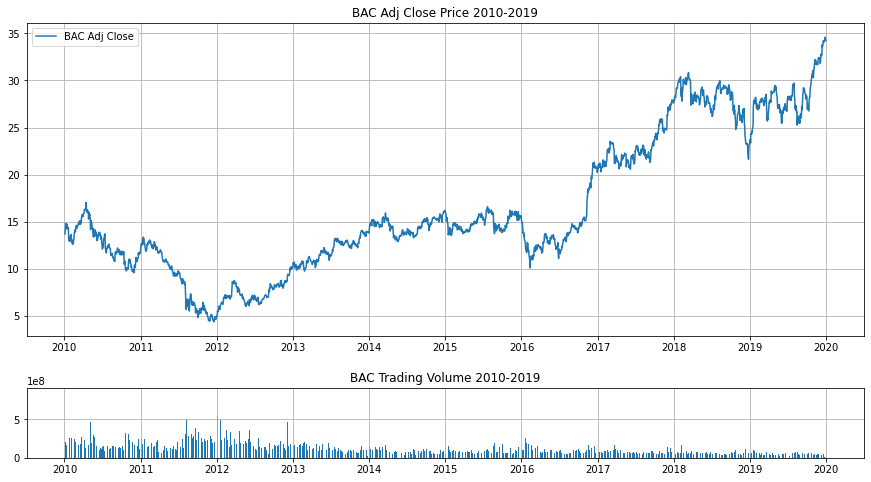

In [ ]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(data['Adj Close']['BAC'].index, data['Adj Close']['BAC'], label='BAC Adj Close')
plt.title('BAC Adj Close Price 2010-2019')
plt.legend(loc=2)
plt.grid(True)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(data['Volume']['BAC'].index, data['Volume']['BAC'])
plt.title('BAC Trading Volume 2010-2019')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

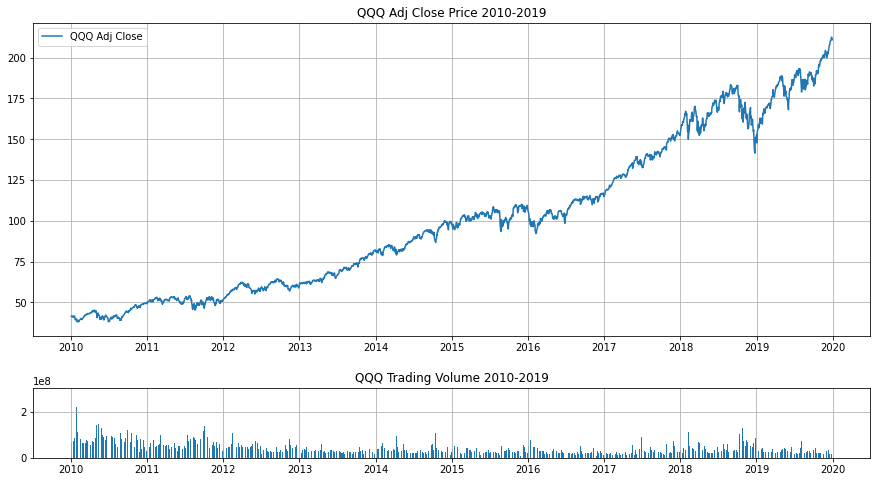

In [ ]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(data['Adj Close']['QQQ'].index, data['Adj Close']['QQQ'], label='QQQ Adj Close')
plt.title('QQQ Adj Close Price 2010-2019')
plt.legend(loc=2)
plt.grid(True)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(data['Volume']['QQQ'].index, data['Volume']['QQQ'])
plt.title('QQQ Trading Volume 2010-2019')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

Returns

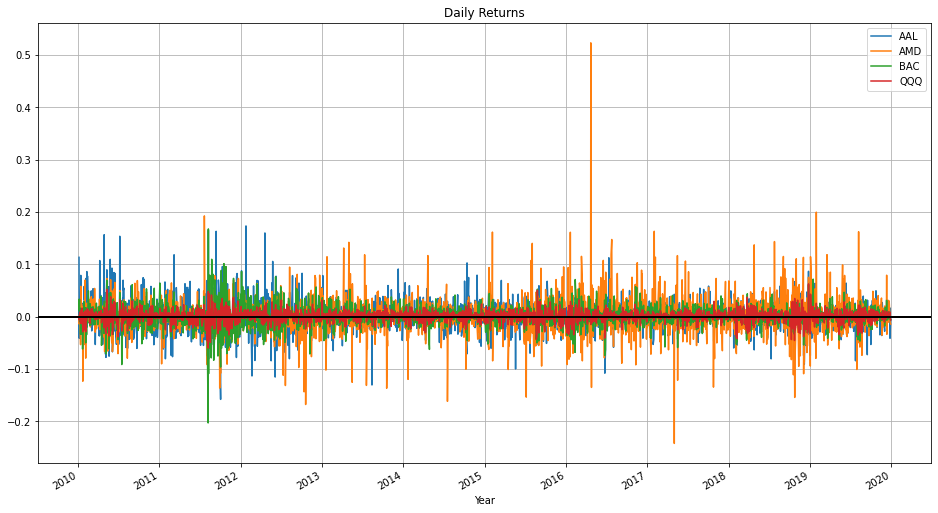

In [ ]:
daily_returns = data.drop(columns=['^DJI'], level=1).apply(lambda x: x / x[0]).pct_change()
daily_returns['Adj Close'].plot(grid=True, title='Daily Returns', xlabel='Year').axhline(color='black', lw=2)

- AAL returns had highly volatile during 2010-2015.
- AMD returns have been volatile since 2011.
- BAC returns had highly volatile during 2011-2012.
- QQQ returns had less volatile.

Log Returns

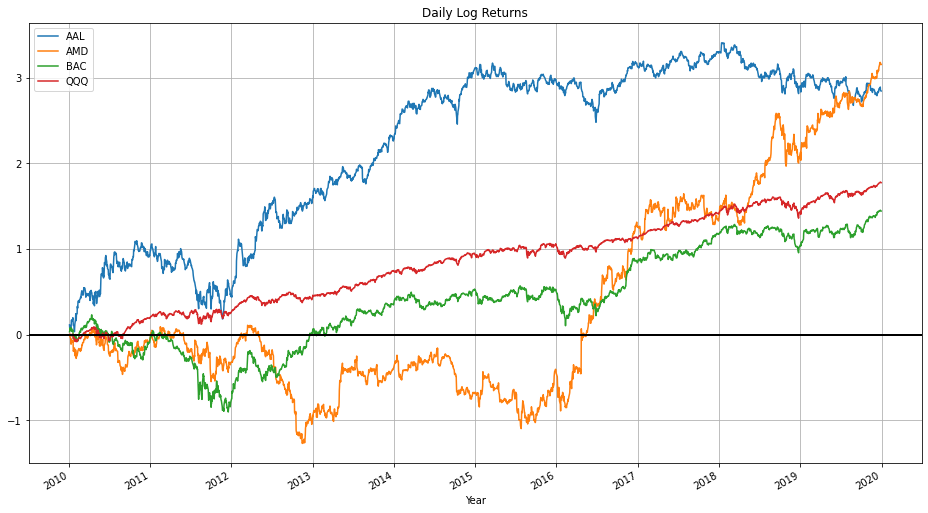

In [ ]:
daily_log_returns = daily_returns.cumsum()
daily_log_returns['Adj Close'].plot(grid=True, title='Daily Log Returns', xlabel='Year').axhline(color='black', lw=2)

- AAL log returns were highest, but decreased in 2011.
- AMD log returns had highly decreased during 2012-2015, then have risen ever since.
- BAC log returns had highly decreased during 2011-2013, then have gradually increased ever since.
- QQQ log returns have gradually increased.

Cumulative Returns

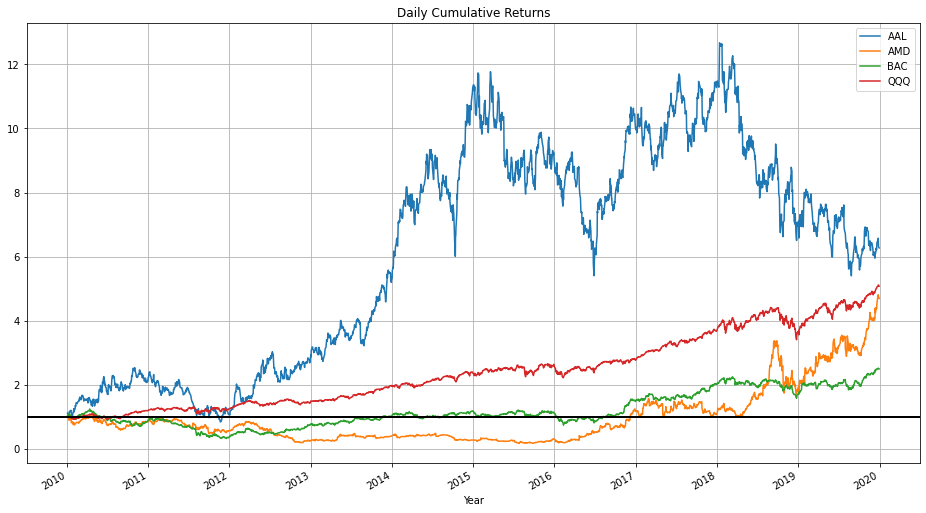

In [ ]:
daily_cum_returns = (1 + daily_returns).cumprod()
daily_cum_returns['Adj Close'].plot(grid=True, title='Daily Cumulative Returns', xlabel='Year').axhline(color='black', lw=2, y=1)

- AAL shares grew until 2018, and then has been falling since.
- AMD shares lost until 2016, and then has been growing since.
- BAC shares lost until 2012, grew until 2014, remained relatively stable until 2017, and then has been growing since.
- QQQ shares keep growing since 2010.

Histogram Plot of Returns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97e44ce6d8>,
      dtype=object)

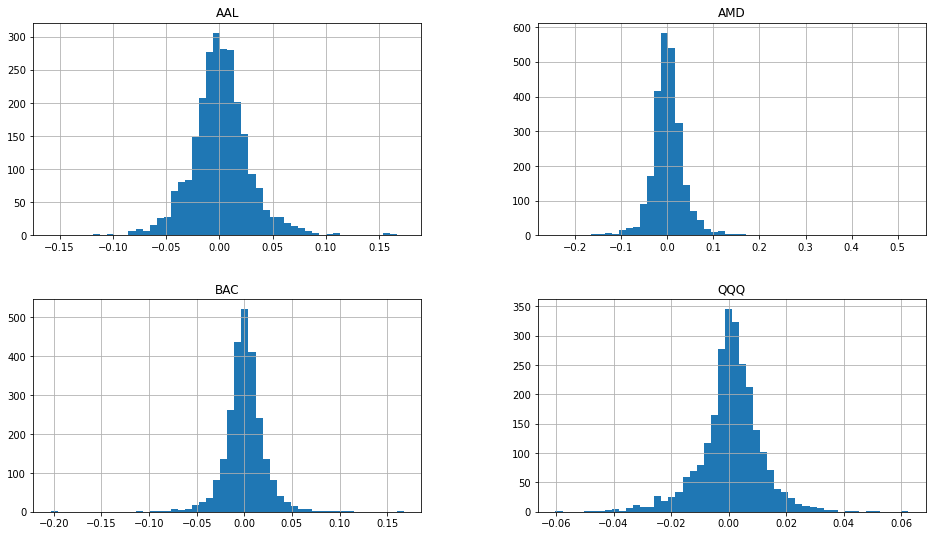

In [ ]:
daily_returns['Adj Close'].hist(bins=50)

Rolling Volatility Plot of Returns

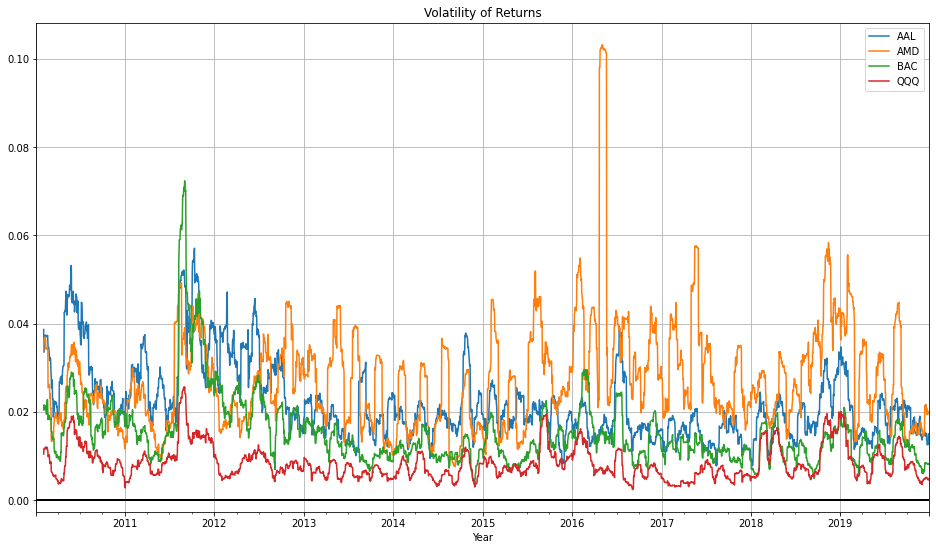

In [ ]:
data_filled = data.drop(columns=['^DJI'], level=1).asfreq('D', method='ffill')
data_returns = data_filled.pct_change()
data_std = data_returns.rolling(window=30, min_periods=30).std()
data_std['Adj Close'].plot(grid=True, title='Volatility of Returns', xlabel='Year').axhline(color='black', lw=2)

Quantile-Quantile Plot of Returns

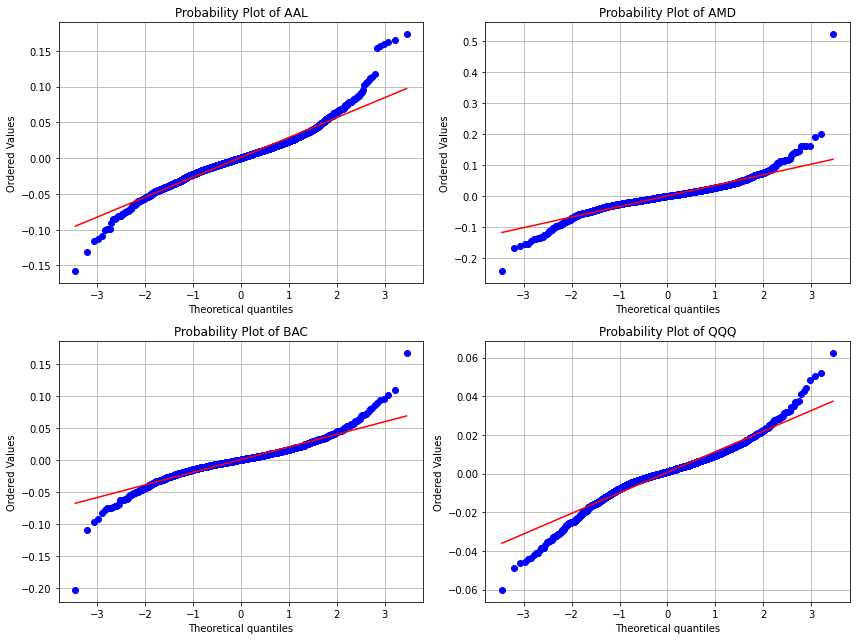

In [ ]:
data_dropna = data.drop(columns=['^DJI'], level=1).pct_change().dropna()
figure = plt.figure(figsize=(12, 9))
ax1 = figure.add_subplot(221)
ax2 = figure.add_subplot(222)
ax3 = figure.add_subplot(223)
ax4 = figure.add_subplot(224)
stats.probplot(data_dropna['Adj Close']['AAL'], dist='norm', plot=ax1)
stats.probplot(data_dropna['Adj Close']['AMD'], dist='norm', plot=ax2)
stats.probplot(data_dropna['Adj Close']['BAC'], dist='norm', plot=ax3)
stats.probplot(data_dropna['Adj Close']['QQQ'], dist='norm', plot=ax4)
ax1.set_title('Probability Plot of AAL')
ax2.set_title('Probability Plot of AMD')
ax3.set_title('Probability Plot of BAC')
ax4.set_title('Probability Plot of QQQ')
figure.tight_layout()
plt.show()

Skewness and Kurtosis

In [ ]:
AAL_skew = skew(daily_returns['Adj Close']['AAL'].dropna())
AMD_skew = skew(daily_returns['Adj Close']['AMD'].dropna())
BAC_skew = skew(daily_returns['Adj Close']['BAC'].dropna())
QQQ_skew = skew(daily_returns['Adj Close']['QQQ'].dropna())
AAL_kurtosis = kurtosis(daily_returns['Adj Close']['AAL'].dropna())
AMD_kurtosis = kurtosis(daily_returns['Adj Close']['AMD'].dropna())
BAC_kurtosis = kurtosis(daily_returns['Adj Close']['BAC'].dropna())
QQQ_kurtosis = kurtosis(daily_returns['Adj Close']['QQQ'].dropna())
list_skew_kurtosis = [(AAL_skew, AMD_skew, BAC_skew, QQQ_skew), (AAL_kurtosis, AMD_kurtosis, BAC_kurtosis, QQQ_kurtosis)]
data_skew_kurtosis = pd.DataFrame(list_skew_kurtosis, columns=['AAL', 'AMD', 'BAC', 'QQQ'], index=['Skewness', 'Kurtosis'])
data_skew_kurtosis

,AAL,AMD,BAC,QQQ
Skewness,0.413071,1.229553,-0.13731,-0.314756
Kurtosis,3.879760,20.837069,8.27520,3.077230


- AAL, BAC, and QQQ skewness are between -0.5 and 0.5, the returns are fairly symmetrical.
- AMD skewness is greater than 1 (positively skewed), the returns are highly skewed.
- AAL, AMD, BAC, and QQQ kurtosis are greater than 3 (leptokurtic), the returns are heavytailed or profusion of outliers.

Fit Normal Distribution with the Histogram

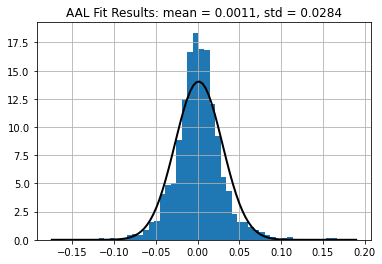

In [ ]:
figure = plt.figure(figsize=(6, 4))
_, bins, _ = plt.hist(data_dropna['Adj Close']['AAL'], bins=50, density=True)
mean, std = norm.fit(data_dropna['Adj Close']['AAL'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'AAL Fit Results: mean = %.4f, std = %.4f' % (mean, std)
plt.title(title)
plt.show()

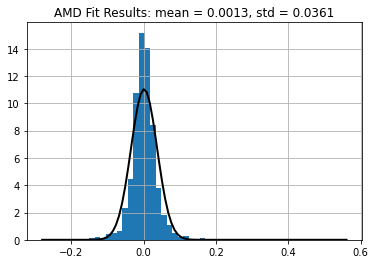

In [ ]:
figure = plt.figure(figsize=(6, 4))
_, bins, _ = plt.hist(data_dropna['Adj Close']['AMD'], bins=50, density=True)
mean, std = norm.fit(data_dropna['Adj Close']['AMD'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'AMD Fit Results: mean = %.4f, std = %.4f' % (mean, std)
plt.title(title)
plt.show()

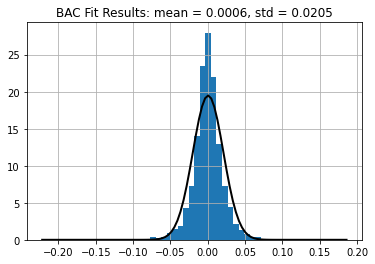

In [ ]:
figure = plt.figure(figsize=(6, 4))
_, bins, _ = plt.hist(data_dropna['Adj Close']['BAC'], bins=50, density=True)
mean, std = norm.fit(data_dropna['Adj Close']['BAC'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'BAC Fit Results: mean = %.4f, std = %.4f' % (mean, std)
plt.title(title)
plt.show()

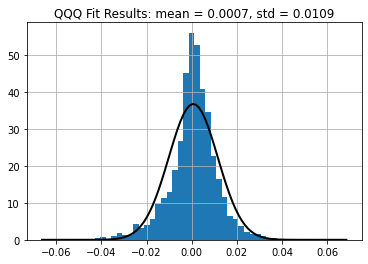

In [ ]:
figure = plt.figure(figsize=(6, 4))
_, bins, _ = plt.hist(data_dropna['Adj Close']['QQQ'], bins=50, density=True)
mean, std = norm.fit(data_dropna['Adj Close']['QQQ'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = 'QQQ Fit Results: mean = %.4f, std = %.4f' % (mean, std)
plt.title(title)
plt.show()

From the Histogram Plot, Rolling Volatility Plot, and Quantile-Quantile Plot of AAL, AMD, BAC, and QQQ returns are all not fit with normal distribution.

Correlation Matrix

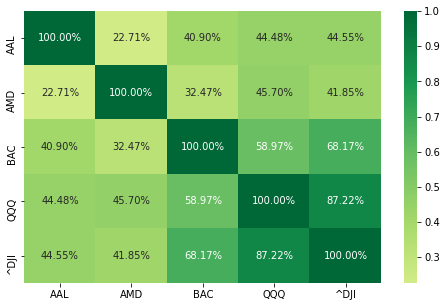

In [ ]:
figure = plt.figure(figsize=(8, 5))
_ = sns.heatmap(data['Adj Close'].pct_change().dropna().corr(), annot=True, fmt=".2%", cmap="RdYlGn", center=0)
plt.show()

- QQQ and DJI returns have very strong positive correlation.
- BAC and DJI returns have strong positive correlation.
- AAL and DJI returns have some positive correlation.
- AMD and DJI returns have some positive correlation.

Rolling Correlations

In [ ]:
data_rolling = data['Adj Close'].pct_change().rolling(21)
corr_change = data['Adj Close'].pct_change().rolling(21).sum().fillna(0)
std = data['Adj Close'].pct_change().rolling(21).std().fillna(0)
corr_change['AAL'] = data_rolling['^DJI'].corr(data['Adj Close']['AAL'].pct_change().fillna(0))
corr_change['AMD'] = data_rolling['^DJI'].corr(data['Adj Close']['AMD'].pct_change().fillna(0))
corr_change['BAC'] = data_rolling['^DJI'].corr(data['Adj Close']['BAC'].pct_change().fillna(0))
corr_change['QQQ'] = data_rolling['^DJI'].corr(data['Adj Close']['QQQ'].pct_change().fillna(0))
corr_change.drop('^DJI', axis=1, inplace=True)

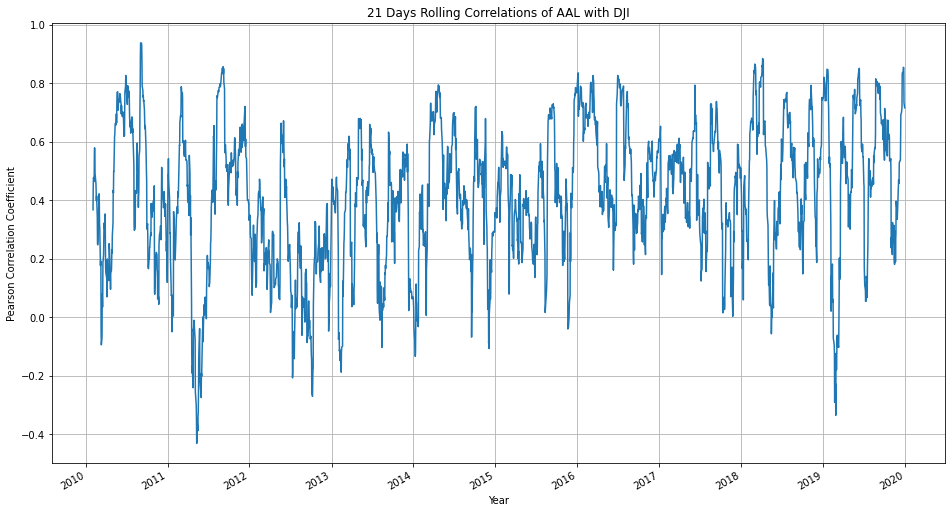

In [ ]:
corr_change['AAL'].plot(grid=True, title='21 Days Rolling Correlations of AAL with DJI', xlabel='Year', ylabel='Pearson Correlation Coefficient')

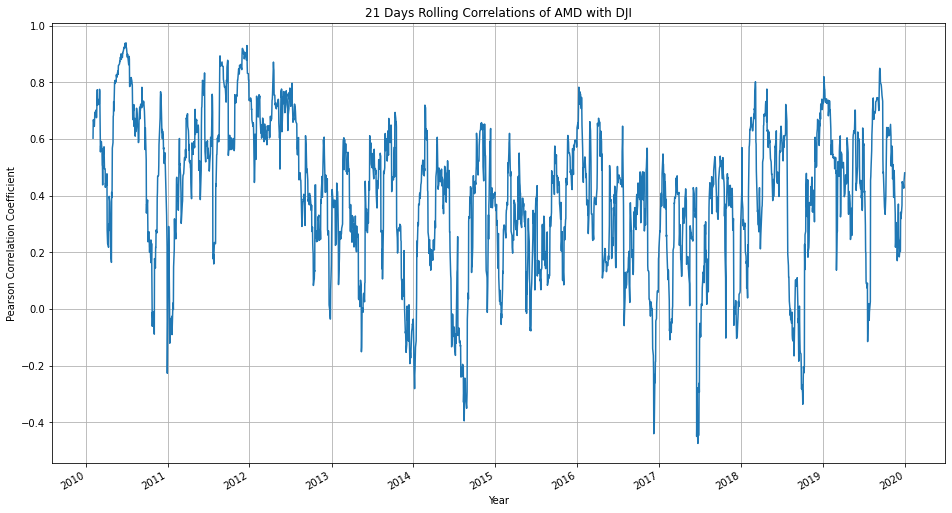

In [ ]:
corr_change['AMD'].plot(grid=True, title='21 Days Rolling Correlations of AMD with DJI', xlabel='Year', ylabel='Pearson Correlation Coefficient')

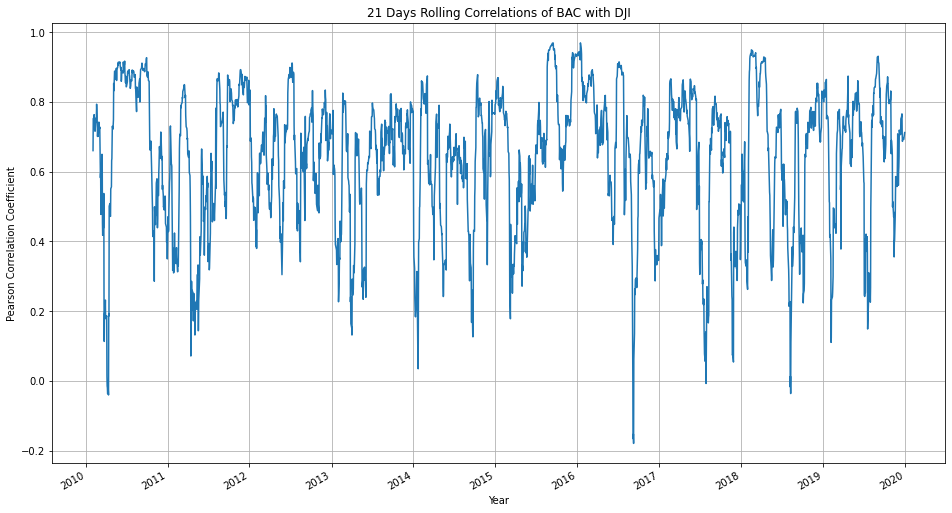

In [ ]:
corr_change['BAC'].plot(grid=True, title='21 Days Rolling Correlations of BAC with DJI', xlabel='Year', ylabel='Pearson Correlation Coefficient')

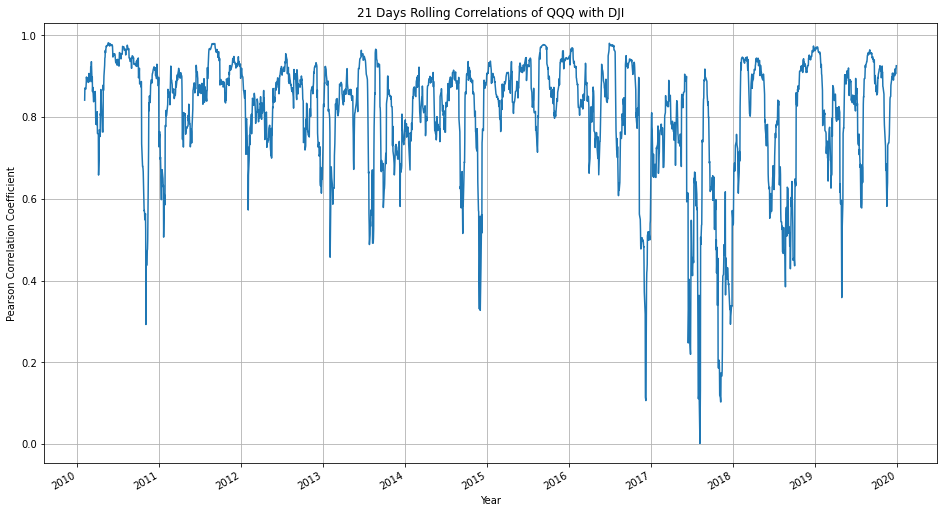

In [ ]:
corr_change['QQQ'].plot(grid=True, title='21 Days Rolling Correlations of QQQ with DJI', xlabel='Year', ylabel='Pearson Correlation Coefficient')

- AAL and DJI had negative correlation during 2011, then has been positive since.
- AMD and DJI had a little negative correlation during 2011, and some negative correlation between 2013-2015, and 2017-2018.
- BAC and DJI had strong positive correlation since 2011, but still had a little negative correlation during 2010 and 2016.
- QQQ and DJI had relatively very strong positive correlation since 2010, but still had a little positive correlation during 2017.